In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
# data=pd.read_csv('/kaggle/input/sydney-house-prices/SydneyHousePrices.csv')
data=pd.read_csv('SydneyHousePrices.csv')
data.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [4]:
data=data.drop('Date',axis=1) #not using date
data.head()

,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [5]:
data.describe()

,Id,postalCode,sellPrice,bed,bath,car
count,199504.00000,199504.000000,1.995040e+05,199350.000000,199504.000000,181353.000000
mean,99752.50000,2196.379155,1.269776e+06,3.516479,1.890669,1.936224
std,57591.98839,193.053467,6.948239e+06,1.066555,0.926001,1.060237
min,1.00000,2000.000000,1.000000e+00,1.000000,1.000000,1.000000
25%,49876.75000,2082.000000,7.200000e+05,3.000000,1.000000,1.000000
50%,99752.50000,2144.000000,9.850000e+05,3.000000,2.000000,2.000000
75%,149628.25000,2211.000000,1.475000e+06,4.000000,2.000000,2.000000
max,199504.00000,4878.000000,2.147484e+09,99.000000,99.000000,41.000000


In [6]:
#Q1-1
#Determine which features are continuous vs. categorical. Drop rows without a valid sales price.
data.isnull().sum() #check
#data.dropna(inplace=True)
#no need to drop because all have sales price.

Id                0
suburb            0
postalCode        0
sellPrice         0
bed             154
bath              0
car           18151
propType          0
dtype: int64

In [7]:
#s_imputer and columntransformer by pipeline but it does not work
#mainly training doesn't work.
#source: https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer/54160620
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['bed', 'bath','car']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['suburb', 'propType', 'postalCode']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [8]:
from sklearn.linear_model import LogisticRegression
clf = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier', LogisticRegression(solver='lbfgs'))]) 

In [9]:
X = data[['bed', 'bath','car','suburb', 'propType', 'postalCode']]
y = data['sellPrice']

In [10]:
#clf.fit(X,y)
#doesnt work, don't run

In [11]:
data.isnull().sum() #check

Id                0
suburb            0
postalCode        0
sellPrice         0
bed             154
bath              0
car           18151
propType          0
dtype: int64

In [12]:
#s_imputer
from sklearn.impute import SimpleImputer
s_imputer=SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
s_imputer=s_imputer.fit(data[['bed','car']])
data[['bed','car']]=s_imputer.transform(data[['bed','car']])

In [13]:
#Q1-2
#Visualize the univariate distribution of each continuous variable, and the distribution of the target.
#Do you notice anything? Is there something that might require special treatment?

In [14]:
#continuous: sellPrice, bed, bath, car
#categorical: suburb, propType, postalCode
data_con = data[['sellPrice', 'bed', 'bath','car']]
data_cat = data[['suburb', 'propType', 'postalCode']]

In [15]:
import matplotlib.pyplot as plt
for i in data_con.columns:
    plt.hist(data_con[i])
    plt.title(i)
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [16]:
#does not look like gausian distribution, will use log.

In [17]:
#Q1-4
#Split the data in training and testing set. Do not use the test set 
#unless for a final evaluation in the 5th subquestion.
#Use ColumnTransformer to encode categorical variables.
#Impute missing values using SimpleImputer.
#Evaluate Linear Regression (OLS), Ridge, Lasso and Elasticnet (although we didn’t
#talk about lasso or elasticnet in class yet, but you can easily find reference online) using cross-validation
#with the default parameters.
#Dose scaling the data with StandardScaler help? Use the preprocessing that works best going forward.

In [18]:
from sklearn.model_selection import train_test_split
#I failed to use columntransformer so I only use numerical data
x_train, x_test, y_train, y_test = train_test_split(data[['bed', 'bath', 'car']],
                                                    data['sellPrice'], random_state = 1)

In [19]:
#Ridge
from sklearn.linear_model import Ridge
score = Ridge().fit(x_train, y_train).score(x_test, y_test)
print(score)

0.13354717346954936


In [20]:
#0.13 is too low, using log may improve

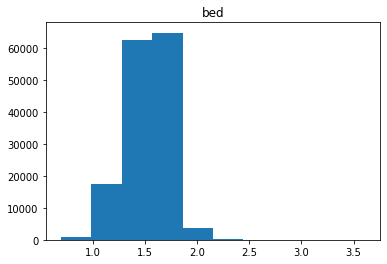

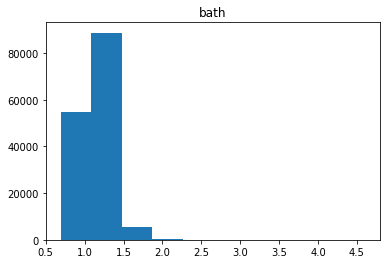

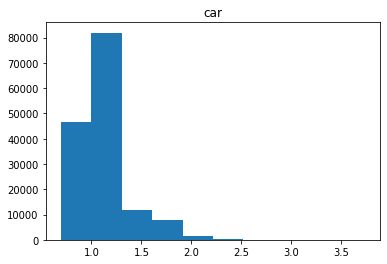

In [21]:
x_train_log = np.log(x_train + 1)
x_test_log = np.log(x_test + 1)
y_train_log = np.log(y_train + 1)
y_test_log = np.log(y_test + 1)
for i in x_train_log.columns:
    plt.hist(x_train_log[i])
    plt.title(i)
    plt.show()

(array([9.00000e+00, 0.00000e+00, 4.10000e+01, 1.80000e+01, 2.20000e+01,
        1.18760e+04, 1.35403e+05, 2.24800e+03, 8.00000e+00, 3.00000e+00]),
 array([ 0.69314718,  2.77258872,  4.85203026,  6.93147181,  9.01091335,
        11.09035489, 13.16979643, 15.24923797, 17.32867951, 19.40812106,
        21.4875626 ]),
 <a list of 10 Patch objects>)

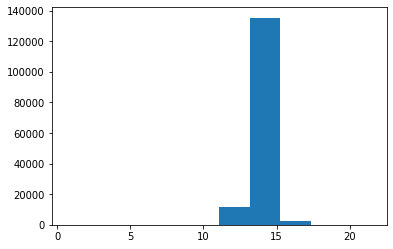

In [22]:
plt.hist(y_train_log)

In [23]:
score = Ridge().fit(x_train_log, y_train_log).score(x_test_log, y_test_log)
print(score)

0.22107635196393716


In [24]:
#improved from 0.13 to 0.22 but still not enough

In [25]:
#Linear Regression (OLS)
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train_log, y_train_log)

# Make predictions using the testing set
y_pred = regr.predict(x_test_log)

# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [0.30533812 0.66856096 0.18079116]


In [26]:
#Lasso
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train_log, y_train_log)

print(clf.coef_)

print(clf.intercept_)

[0. 0. 0.]
13.861868121130897


In [27]:
#Elasticnet
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
regr = ElasticNet(random_state=0)
regr.fit(x_train_log, y_train_log)

print(regr.coef_)

print(regr.intercept_)

[0. 0. 0.]
13.861868121130897


In [28]:
data_indep = data[['bed', 'bath', 'car']]
data_dep = data[['sellPrice']]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x_train_log = scaler.fit_transform(x_train_log)

scaled_x_test_log = scaler.fit_transform(x_test_log)

score = Ridge().fit(scaled_x_train_log, y_train_log).score(scaled_x_test_log, y_test_log)
print(score)

0.2210959825748786


In [30]:
#0.22-> 0.22 scaling also did not help.

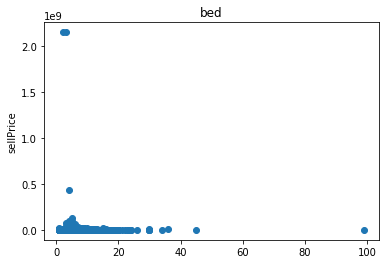

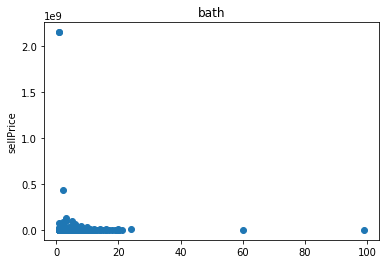

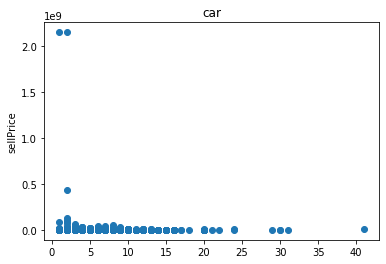

In [31]:
#Q1-3Visualize the dependency of the target on each continuous feature (2d scatter plot)
for i in data_indep.columns:
    plt.scatter(data_indep[i], data_dep)
    plt.title(i)
    plt.ylabel('sellPrice')
    plt.show()

In [32]:
#Q1-5
#Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the
#dependence of the validation score on the parameters for Ridge, Lasso and Elasticnet.

In [33]:
# from sklearn.svm import SVC, doesnt work - i tried to understand from the explanation and library but does not work with my dataset
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(scaled_x_train_log, y_train)

In [34]:
#Don't I need categorical target? which this data does not?

In [35]:
# y_pred = classifier.predict(X_test)

In [36]:
# Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

# from sklearn.metrics import accuracy_score
# accuracy=accuracy_score(y_test,y_pred)

# accuracy
#source: https://github.com/krishnaik06/GRIDSearchCV/blob/master/Gridsearchcv.ipynb

In [37]:
# Applying Grid Search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#               {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(scaled_X_train_log, y_train_log)

#source: https://github.com/krishnaik06/GRIDSearchCV/blob/master/Gridsearchcv.ipynb

In [38]:
#Q-2
data=pd.read_csv('p556_hw1_q2_data.csv')
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [39]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [40]:
data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [41]:
#Q2-1 Determine which features are continuous and which ones are categorical.
data_con = data[['duration', 'credit_amount', 'installment_commitment','residence_since', 'age', 'existing_credits', 'num_dependents']]
data_cat = data[['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties',
                'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']]



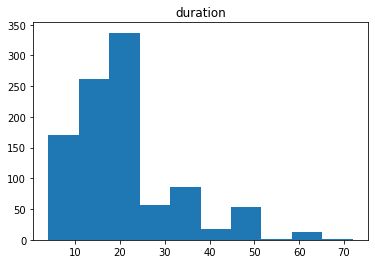

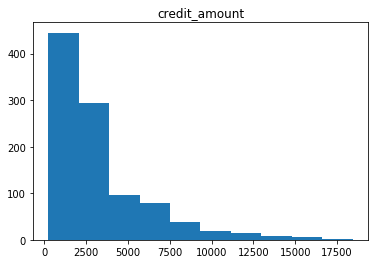

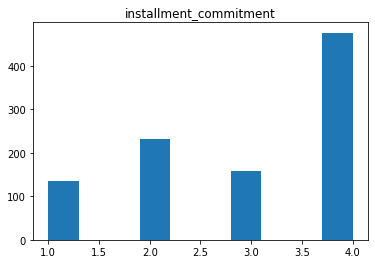

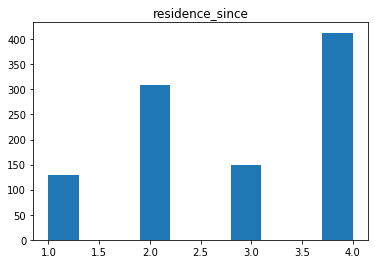

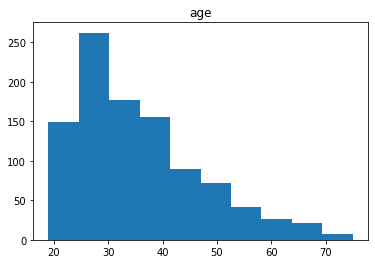

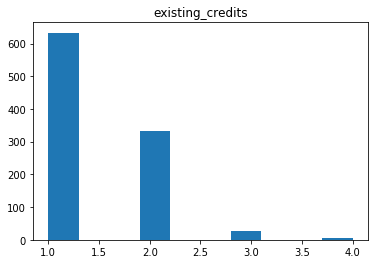

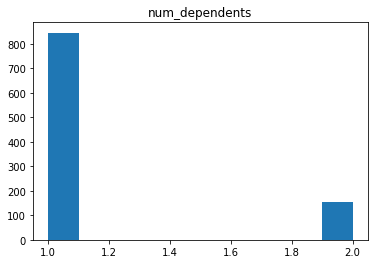

In [42]:
#Q2-2 Visualize the univariate distribution of each continuous variable, and the distribution of the target.
for i in data_con.columns:
    plt.hist(data_con[i])
    plt.title(i)
    plt.show()

In [43]:
X = data[['duration', 'credit_amount', 'installment_commitment','residence_since', 'age', 'existing_credits', 'num_dependents']]
y = data['class']
#since I can't use columntransfer, I will be using numercial(continuous) values

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 1)

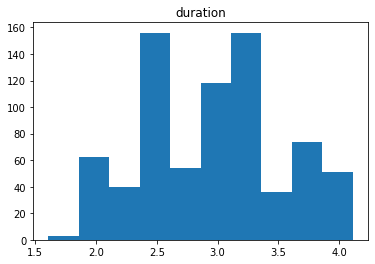

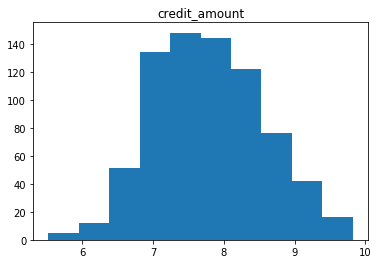

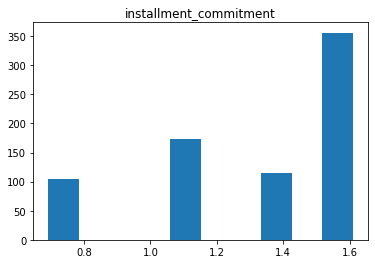

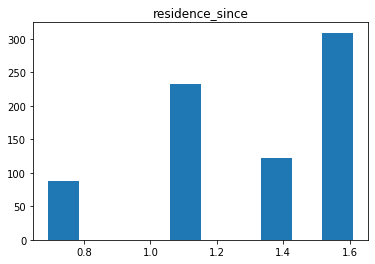

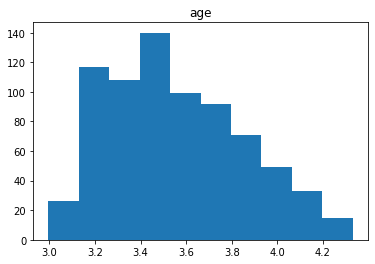

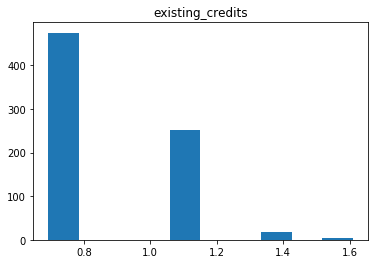

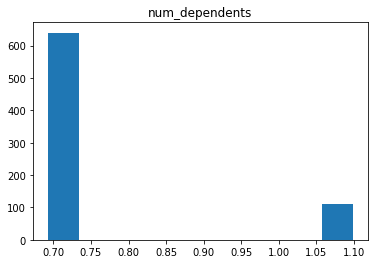

In [45]:
#comparing above with log
x_train_log = np.log(x_train + 1)
x_test_log = np.log(x_test + 1)
for i in x_train_log.columns:
    plt.hist(x_train_log[i])
    plt.title(i)
    plt.show()

In [46]:
#duration, age, and credit amount looks much better

In [47]:
x_train_log.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
298,2.944439,7.830426,1.386294,1.609438,3.784190,0.693147,0.693147
160,3.218876,7.963112,1.386294,1.609438,3.610918,0.693147,1.098612
268,2.708050,9.102644,0.693147,1.609438,3.828641,0.693147,0.693147
658,3.433987,8.348064,1.098612,0.693147,3.367296,1.098612,0.693147
996,3.433987,8.257904,1.609438,1.609438,3.713572,0.693147,0.693147


In [48]:
data.isnull().sum() #check
#data.dropna(inplace=True)

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [49]:
x_train_log.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,2.947360,7.782073,1.328430,1.308835,3.555658,0.851830,0.752615
std,0.540991,0.774492,0.326945,0.309800,0.295084,0.216265,0.143538
min,1.609438,5.525453,0.693147,0.693147,2.995732,0.693147,0.693147
25%,2.564949,7.213215,1.098612,1.098612,3.332205,0.693147,0.693147
50%,2.944439,7.739140,1.386294,1.386294,3.526361,0.693147,0.693147
75%,3.218876,8.286836,1.609438,1.609438,3.761200,1.098612,0.693147
max,4.110874,9.821464,1.609438,1.609438,4.330733,1.609438,1.098612


In [50]:
#logistic regression
clf = LogisticRegression(random_state=0).fit(x_train_log, y_train)
clf.score(X, y)

/Users/jongwon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.703

In [51]:
scaler = StandardScaler()

scaled_x_train_log = scaler.fit_transform(x_train_log)

scaled_x_test_log = scaler.fit_transform(x_test_log)

clf = LogisticRegression(random_state=0).fit(scaled_x_train_log, y_train)
clf.score(X, y)

/Users/jongwon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.3

In [52]:
#I could have done it wrong but scaling continuous variable does not help improbe the score

In [53]:
#Linear Support Vector Machines
#nearest neighbors

In [54]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train_log, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [55]:
y_pred = classifier.predict(x_test_log)

In [56]:
y_pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
      

In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

accuracy
#source: https://github.com/krishnaik06/GRIDSearchCV/blob/master/Gridsearchcv.ipynb

0.704

In [58]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train_log, y_train)

# source: https://github.com/krishnaik06/GRIDSearchCV/blob/master/Gridsearchcv.ipynb

In [59]:
accuracy = grid_search.best_score_

In [60]:
accuracy

0.7066666666666667

In [61]:
grid_search.best_params_

{'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}

In [62]:
#the result barely improved

In [63]:
classifier = SVC(kernel = 'rbf', gamma=0.7)
classifier.fit(x_train_log, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
# Predicting the Test set results
y_pred = classifier.predict(x_test_log)

In [65]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#I am trying this although I was not asked to because it may improve anything.
#source: https://github.com/krishnaik06/GRIDSearchCV/blob/master/Gridsearchcv.ipynb

In [66]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [67]:
accuracy

0.7

In [68]:
# I have no clue how to google or implement lecture to code. I hope there will be a clear answer sheet and explanation so I and other students don't fall behind.